In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
df = pd.read_csv(r'C:\Users\Tnluser\Downloads\FB-1.csv')
df.head()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
0,246675545449582_1649696485147474,529,512,262,432,92,3,1,1,0,0,0,0
1,246675545449582_1649426988507757,150,0,0,150,0,0,0,0,0,0,1,0
2,246675545449582_1648730588577397,227,236,57,204,21,1,1,0,0,0,0,0
3,246675545449582_1648576705259452,111,0,0,111,0,0,0,0,0,0,1,0
4,246675545449582_1645700502213739,213,0,0,204,9,0,0,0,0,0,1,0


In [26]:
df.shape

(7050, 13)

In [27]:
df.dtypes

status_id        object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
status_link       int64
status_photo      int64
status_status     int64
dtype: object

In [28]:
# Check for correlation of variable
df.corr(method='pearson')

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
num_reactions,1.000000,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326,0.028743,-0.131515,0.105402
num_comments,0.150843,1.000000,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184,-0.023340,-0.291846,-0.049413
num_shares,0.250723,0.640637,1.000000,0.172492,0.820000,0.407628,0.399826,0.199970,0.312513,-0.025708,-0.354780,-0.066524
num_likes,0.994923,0.101687,0.172492,1.000000,0.209308,0.207800,0.120784,0.052169,0.087431,0.032658,-0.100537,0.114631
num_loves,0.305003,0.521223,0.820000,0.209308,1.000000,0.508798,0.507830,0.207600,0.371001,-0.029523,-0.351741,-0.065283
num_wows,0.267752,0.162394,0.407628,0.207800,0.508798,1.000000,0.287756,0.086503,0.183087,-0.011968,-0.086409,-0.003129
num_hahas,0.176028,0.325048,0.399826,0.120784,0.507830,0.287756,1.000000,0.141421,0.211910,-0.015951,-0.159237,-0.034656
num_sads,0.075138,0.236453,0.199970,0.052169,0.207600,0.086503,0.141421,1.000000,0.142072,-0.014489,-0.078953,0.020866
num_angrys,0.124326,0.225184,0.312513,0.087431,0.371001,0.183087,0.211910,0.142072,1.000000,-0.014789,-0.115695,-0.028465
status_link,0.028743,-0.023340,-0.025708,0.032658,-0.029523,-0.011968,-0.015951,-0.014489,-0.014789,1.000000,-0.118315,-0.022188


<AxesSubplot:>

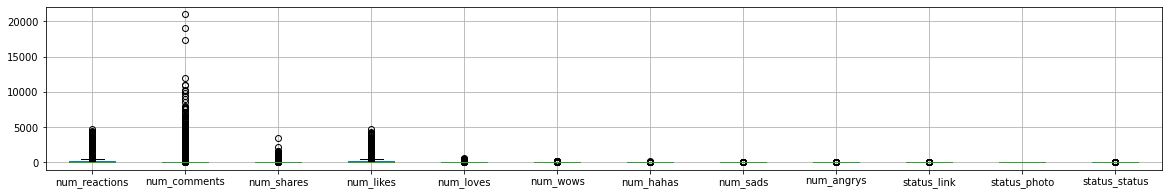

In [29]:
df.boxplot(figsize=(20,3))

In [34]:
data_new = df.drop(['status_id'], axis =1)

In [35]:
from scipy.stats import zscore
data_new=data_new.apply(zscore)
data_new.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,-0.094957,-1.245993,-0.233666
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,-0.094957,0.802573,-0.233666
2,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748,-0.094957,-1.245993,-0.233666
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,-0.094957,0.802573,-0.233666
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,-0.094957,0.802573,-0.233666


In [36]:
#df_std = StandardScaler().fit_transform(df)
#df_std

In [43]:
data_new.corr(method='pearson')

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
num_reactions,1.000000,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326,0.028743,-0.131515,0.105402
num_comments,0.150843,1.000000,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184,-0.023340,-0.291846,-0.049413
num_shares,0.250723,0.640637,1.000000,0.172492,0.820000,0.407628,0.399826,0.199970,0.312513,-0.025708,-0.354780,-0.066524
num_likes,0.994923,0.101687,0.172492,1.000000,0.209308,0.207800,0.120784,0.052169,0.087431,0.032658,-0.100537,0.114631
num_loves,0.305003,0.521223,0.820000,0.209308,1.000000,0.508798,0.507830,0.207600,0.371001,-0.029523,-0.351741,-0.065283
num_wows,0.267752,0.162394,0.407628,0.207800,0.508798,1.000000,0.287756,0.086503,0.183087,-0.011968,-0.086409,-0.003129
num_hahas,0.176028,0.325048,0.399826,0.120784,0.507830,0.287756,1.000000,0.141421,0.211910,-0.015951,-0.159237,-0.034656
num_sads,0.075138,0.236453,0.199970,0.052169,0.207600,0.086503,0.141421,1.000000,0.142072,-0.014489,-0.078953,0.020866
num_angrys,0.124326,0.225184,0.312513,0.087431,0.371001,0.183087,0.211910,0.142072,1.000000,-0.014789,-0.115695,-0.028465
status_link,0.028743,-0.023340,-0.025708,0.032658,-0.029523,-0.011968,-0.015951,-0.014489,-0.014789,1.000000,-0.118315,-0.022188


In [37]:
cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00014186  0.1508643   0.25075809  0.99506451  0.30504605  0.2677898
   0.17605301  0.07514867  0.1243437   0.02874721 -0.13153369  0.10541715]
 [ 0.1508643   1.00014186  0.64072829  0.10170146  0.52129743  0.16241703
   0.32509411  0.23648623  0.22521631 -0.02334367 -0.29188709 -0.04942026]
 [ 0.25075809  0.64072829  1.00014186  0.1725164   0.82011657  0.40768568
   0.39988229  0.19999833  0.31255689 -0.02571137 -0.35483022 -0.06653382]
 [ 0.99506451  0.10170146  0.1725164   1.00014186  0.20933778  0.20782924
   0.12080097  0.05217624  0.08744305  0.03266301 -0.10055153  0.11464773]
 [ 0.30504605  0.52129743  0.82011657  0.20933778  1.00014186  0.50887022
   0.50790168  0.20762964  0.3710539  -0.02952704 -0.35179053 -0.06529185]
 [ 0.2677898   0.16241703  0.40768568  0.20782924  0.50887022  1.00014186
   0.28779702  0.08651499  0.18311248 -0.01196935 -0.0864212  -0.00312953]
 [ 0.17605301  0.32509411  0.39988229  0.12080097  0.50790168  0.28779702
   1.000141

In [38]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 2.93630543e-01  6.06641137e-01  7.15773171e-01  2.03910032e-02
  -1.12002407e-01  4.82435866e-03  3.20850086e-02  2.42016415e-02
  -6.97861393e-02  8.52072210e-02  8.18911389e-02 -1.04601450e-03]
 [ 3.47497866e-01 -2.30746002e-01 -1.26384681e-06  1.67785969e-01
   8.75480006e-02 -5.17376834e-01 -5.15597556e-01 -3.99866919e-02
  -1.69312690e-01  4.37540439e-01  1.86287704e-01  1.59573424e-02]
 [ 4.43254435e-01 -2.04910484e-01  1.73179788e-05 -6.71346886e-01
   3.92859022e-03  4.57024584e-01 -1.12734594e-01 -2.04542894e-01
  -5.09397191e-02  1.96740735e-01 -6.98659821e-02 -3.48387949e-02]
 [ 2.51769604e-01  6.40653903e-01 -6.95423734e-01 -3.90502026e-02
  -1.05702016e-01 -2.79737958e-02  2.54206909e-02  3.28768718e-02
  -8.70489869e-02  9.66955499e-02  1.02090297e-01  1.73807760e-03]
 [ 4.61255079e-01 -1.65917245e-01 -6.18696218e-02  7.03643043e-01
  -5.18155502e-02  4.72074756e-01  7.92827429e-02 -8.44140094e-02
   3.53002915e-02  4.86999544e-03 -1.39427366e-01 -3.3

In [39]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 29.96481572  44.83596514  55.26050708  63.76677335  71.72633406
  78.80526014  85.57084566  91.36695963  95.77246293  98.76278754
  99.99999986 100.        ]


In [40]:
from sklearn.decomposition import PCA

# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 9 to 7)

pca = PCA(n_components=7)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[ 2.49500294, -0.80644199,  0.38778102, ..., -0.97231247,
        -0.46550736, -0.96536827],
       [-0.18957102,  0.00767383, -0.15966981, ..., -0.40295527,
         0.50925543, -0.35632615],
       [-0.42293659,  0.60872631, -0.62573078, ...,  0.53914638,
         0.70494912,  0.54524478],
       ...,
       [-0.07067992,  0.0319256 , -0.30187144, ..., -0.03160793,
         0.09656654, -0.02182985],
       [-0.76515049,  0.01663126, -0.40336141, ...,  0.07582711,
        -0.10224415,  0.06974368],
       [-0.06510389, -0.04240942,  0.14226483, ..., -0.09447845,
         0.03549011, -0.08823347]])

In [41]:
pca.components_

array([[ 0.29363054,  0.34749787,  0.44325444,  0.2517696 ,  0.46125508,
         0.29634039,  0.30885435,  0.16313058,  0.23724676, -0.00138341,
        -0.23261371,  0.01379735],
       [ 0.60664114, -0.230746  , -0.20491048,  0.6406539 , -0.16591724,
         0.01626203, -0.13903343, -0.11041549, -0.12687418,  0.06418546,
         0.03655064,  0.21318874],
       [ 0.11200241, -0.087548  , -0.00392859,  0.10570202,  0.05181555,
         0.21154873,  0.101801  , -0.04987934,  0.08923166, -0.23521304,
         0.64341911, -0.65653464],
       [ 0.00104601, -0.01595734,  0.03483879, -0.00173808,  0.03336338,
         0.03375172,  0.01780145, -0.25206584, -0.042459  ,  0.89259956,
        -0.07188694, -0.35877103],
       [ 0.08189114,  0.1862877 , -0.06986598,  0.1020903 , -0.13942737,
        -0.37729947, -0.13429183,  0.81640504,  0.12355741,  0.20996813,
         0.11148599, -0.15861432],
       [-0.08520722, -0.43754044, -0.19674073, -0.09669555, -0.00487   ,
         0.37224941,  

In [42]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
0,0.293631,0.347498,0.443254,0.251770,0.461255,0.296340,0.308854,0.163131,0.237247,-0.001383,-0.232614,0.013797
1,0.606641,-0.230746,-0.204910,0.640654,-0.165917,0.016262,-0.139033,-0.110415,-0.126874,0.064185,0.036551,0.213189
2,0.112002,-0.087548,-0.003929,0.105702,0.051816,0.211549,0.101801,-0.049879,0.089232,-0.235213,0.643419,-0.656535
3,0.001046,-0.015957,0.034839,-0.001738,0.033363,0.033752,0.017801,-0.252066,-0.042459,0.892600,-0.071887,-0.358771
4,0.081891,0.186288,-0.069866,0.102090,-0.139427,-0.377299,-0.134292,0.816405,0.123557,0.209968,0.111486,-0.158614


In [11]:
mean_vec = np.mean(df_std, axis=0)
cov_mat = (df_std - mean_vec).T.dot((df_std - mean_vec)) / (df_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00014186e+00 -7.76943901e-02  2.06324599e-01  6.17249615e-02
  -8.12258760e-02 -3.30510186e-04  6.03467172e-03  8.81245313e-02
   8.81051025e-02  4.93946367e-02  3.39366193e-02 -6.41064547e-02
   1.26064017e-01]
 [-7.76943901e-02  1.00014186e+00  1.50864303e-01  2.50758085e-01
   9.95064514e-01  3.05046050e-01  2.67789804e-01  1.76053008e-01
   7.51486698e-02  1.24343696e-01  2.87472071e-02 -1.31533687e-01
   1.05417149e-01]
 [ 2.06324599e-01  1.50864303e-01  1.00014186e+00  6.40728290e-01
   1.01701461e-01  5.21297432e-01  1.62417028e-01  3.25094108e-01
   2.36486227e-01  2.25216311e-01 -2.33436720e-02 -2.91887094e-01
  -4.94202552e-02]
 [ 6.17249615e-02  2.50758085e-01  6.40728290e-01  1.00014186e+00
   1.72516400e-01  8.20116569e-01  4.07685683e-01  3.99882292e-01
   1.99998334e-01  3.12556894e-01 -2.57113738e-02 -3.54830221e-01
  -6.65338167e-02]
 [-8.12258760e-02  9.95064514e-01  1.01701461e-01  1.72516400e-01
   1.00014186e+00  2.09337781e-01  2.07829240e-

In [12]:
cov_mat = np.cov(df_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-4.95398516e-02 -2.07005001e-01  4.12434087e-01 -2.78521538e-02
  -2.83729157e-06 -1.63502991e-01  2.51065291e-01 -1.46587485e-01
   3.36004989e-01  4.11280684e-01  6.15040777e-01  1.07745347e-01
  -2.50368595e-02]
 [-2.90249072e-01  6.02484963e-01 -1.63439476e-02 -2.23519476e-02
   7.15772988e-01 -1.88841828e-02  4.80499635e-02  1.31367094e-02
   8.32015604e-02  1.25668336e-01  2.10245225e-02  7.88893172e-02
  -8.63195903e-02]
 [-3.50150560e-01 -2.42984835e-01  9.70730081e-02 -1.55716474e-01
  -4.96841271e-07  5.76686482e-01 -4.28655850e-01 -1.04278762e-01
   7.51508771e-02  1.48098679e-01 -6.89896295e-02  1.85033379e-01
  -4.36940701e-01]
 [-4.43138104e-01 -1.88558585e-01 -5.51708954e-02  6.67203225e-01
   1.73820715e-05 -4.46202830e-01 -1.62303919e-01 -1.96948472e-01
  -8.91156573e-02 -8.37196733e-02 -4.11775660e-02  3.82963431e-02
  -1.93724791e-01]
 [-2.48412357e-01  6.33682853e-01 -1.25139939e-03  3.74306008e-02
  -6.95423874e-01  1.27168295e-02  4.77973901e-02  1

In [13]:
eig_vecs[4] #fifth component

array([-0.24841236,  0.63368285, -0.0012514 ,  0.0374306 , -0.69542387,
        0.01271683,  0.04779739,  0.01892266,  0.09496604,  0.14375832,
        0.01515983,  0.09720844, -0.0977327 ])

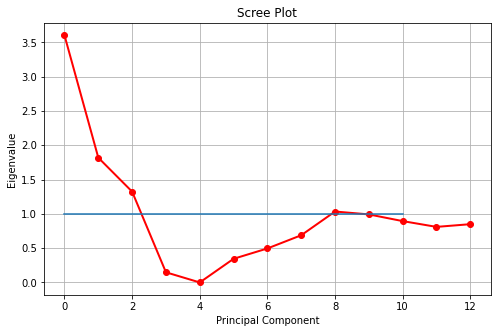

In [14]:
fig = plt.figure(figsize=(8,5))
sing_vals = range(df_std.shape[1])
plt.plot(sing_vals, eig_vals, 'ro-', linewidth=2)
plt.plot(range(0,11),np.ones(11))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [15]:
#explained variances for each of 4 components while performing PCA

pca = PCA(n_components=4)
X_pca= pca.fit_transform(df_std)
pca.explained_variance_

array([3.60260442, 1.81889655, 1.32392371, 1.03418384])

In [17]:
# which follows linear equation of third Principal component in terms of eigenvectors
df.columns

Index(['status_id', 'num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys',
       'status_link', 'status_photo', 'status_status'],
      dtype='object')

In [18]:
pca.components_[2]

array([-0.41243409,  0.01634395, -0.09707301,  0.0551709 ,  0.0012514 ,
        0.12163372,  0.2097203 ,  0.09521569, -0.08653039,  0.09425633,
       -0.2067786 ,  0.51556787, -0.65144429])

In [21]:
print('The Linear eq of 3rd component: ')
for i in range(0,df.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[2][i],3),df.columns[i]),end=' + ')

The Linear eq of 3rd component: 
-0.412 * status_id + 0.016 * num_reactions + -0.097 * num_comments + 0.055 * num_shares + 0.001 * num_likes + 0.122 * num_loves + 0.21 * num_wows + 0.095 * num_hahas + -0.087 * num_sads + 0.094 * num_angrys + -0.207 * status_link + 0.516 * status_photo + -0.651 * status_status + 